<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW3_Classification_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 3. Линейная классификация. Работа с признаками**

### **Оценивание и штрафы**

Кака всегда - каждая из задач имеет «стоимость» (указана в скобках около задачи).

В задании три части:

- Часть 1 (2.5 балла): написание логистической регрессии своими руками
- Часть 2 (5 баллов): различные методы отбора признаков
- Часть 3 (3.5 балла): обучение моделей классификации на текстах

Всего за задание можно получить 11 баллов, но:

**Балл за задание = min{ваш балл, 10}.**

In [1]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# **Часть 1. Логистическая регрессия своими руками (2.5 балла)**

## **Задание 1. Реализуйте класс логистической регрессии, обучаемой с помощью:**

**Задание 1.1 (1 балл). Градиентного спуска**

**Задание 1.2 (1 балл). Стохастического градиентного спуска**

До этого вы писали код без ограничений. Здесь же необходимо соблюдать следующие условия:

- Градиентный спуск необходимо записать в векторном виде;
- Циклы средствами python допускается использовать только для итераций градиентного спуска;

**Класс градиентного спуска должен:**
- В качестве критерия останова использовать (одновременно):
  - проверку на евклидову норму разности весов на двух соседних итерациях задаваемого параметром `tolerance`;
  - достижение максимального числа итераций, задаваемого параметром `max_iter`.
- Обладать атрибутом `loss_history`. В нём после вызова метода fit должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту). Данный атрибут необходим, чтобы проследить, что оптимизационный процесс действительно сходится;
- Инициализировать веса случайным образом или нулевым вектором (на ваш выбор).

Полезно [почитать](https://scikit-learn.org/stable/developers/develop.html).

**Шаблон класса описан ниже, вам нужно реализовать каждую из заготовленных функций.**

**ВАЖНО!** Мы заполняем данный шаблон, даже если он нам не нравится. Менять структуру класса и писать по-своему запрещено - за это будут сняты баллы.

In [2]:
import numpy as np
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, gd_type='stochastic',
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2):
        """
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) — init weights
        eta: learning rate
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration

    def fit(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: self
        """
        self.loss_history = []
        m, n = X.shape
        self.w = self.w0 if self.w0 is not None else np.zeros(n)

        for iteration in range(self.max_iter):
            if self.gd_type == 'stochastic':
                # SGD
                for i in range(m):
                    xi = X[i, :].reshape(1, -1)
                    yi = y[i]
                    gradient = self.calc_gradient(xi, yi)
                    self.w -= self.eta * gradient
                    loss = self.calc_loss(X, y)
                    self.loss_history.append(loss)

            elif self.gd_type == 'full':
                # Full GD
                gradient = self.calc_gradient(X, y)
                new_w = self.w - self.eta * gradient
                loss = self.calc_loss(X, y)
                self.loss_history.append(loss)

                if np.linalg.norm(new_w - self.w) < self.tolerance:
                    break

                self.w = new_w

        return self


    def predict_proba(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return 1 / (1 + np.exp(-np.dot(X, self.w)))


    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return (self.predict_proba(X) >= 0.5).astype(int)

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (ell, d) (ell can be equal to 1 if stochastic)
        y: np.array of shape (ell)
        ---
        output: np.array of shape (d)
        """
        return np.dot(X.T, (self.predict_proba(X) - y)) / len(y)

    def calc_loss(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: float
        """
        return -np.mean(y * np.log(self.predict_proba(X)) + (1 - y) * np.log(1 - self.predict_proba(X)))

Теперь проверим работу вашего класса на синтетических данных.

In [3]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

**Важно:** далее предполагается, что вы используете собственную реализацию логистической регрессии.
Если с написанием класса возникли проблемы, используйте реализацию sklearn, чтобы не терять баллы за остальные задания.

## **Задание 2 (0.5 балла)**

Обучите логистическую регрессию на синтетических данных.

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые. Проинтерпретируйте результат.

In [5]:
lr = LogReg(gd_type='full', tolerance=1e-4, max_iter=1000)
lr.fit(X=X_train, y=y_train)

pred = lr.predict(X_test)


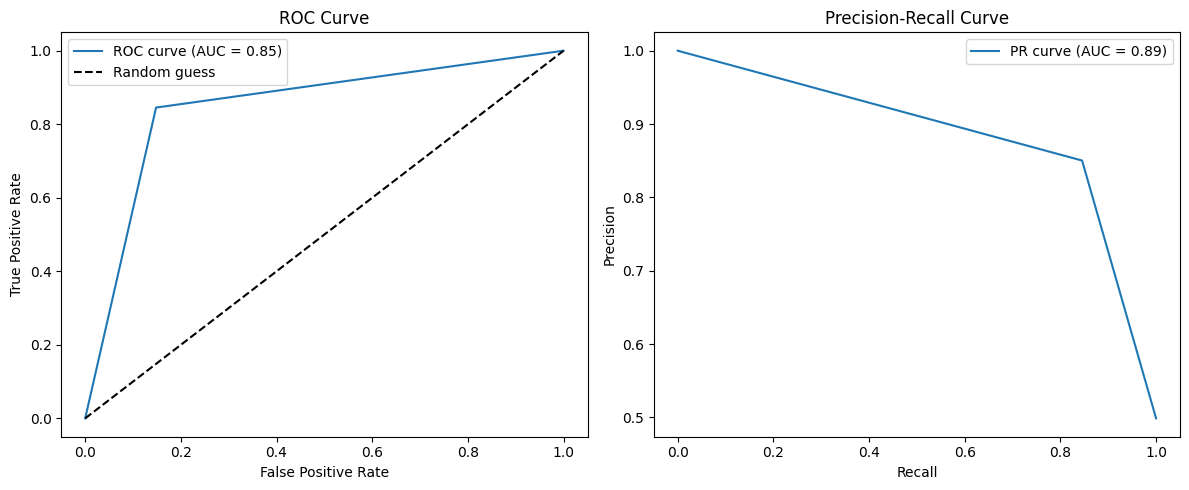

ROC-AUC: 0.85
PR-AUC: 0.89


In [6]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, auc

roc_auc = roc_auc_score(y_test, pred)
fpr, tpr, _ = roc_curve(y_test, pred)


precision, recall, _ = precision_recall_curve(y_test, pred)
pr_auc = auc(recall, precision)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"PR curve (AUC = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()

plt.tight_layout()
plt.show()


print(f"ROC-AUC: {roc_auc:.2f}")
print(f"PR-AUC: {pr_auc:.2f}")

Вывод: Модель хорошо справляется с задачей классификации: она точно предсказывает положительные классы (PR AUC = 0.89) и достаточно уверенно разделяет классы (ROC AUC = 0.85).
Модель может быть использована на практике, но её эффективность также зависит от контекста задачи (например, насколько важны Precision или Recall).

# **Часть 2. Отбор признаков (5 баллов)**

Перейдём к еще одной важной части процесса работы с данными — отбору признаков. Он нужен в следующих случаях:
- Мы хотим сократить время вычислений;
- Мы хотим избежать переобучения;
- Мы хотим попытаться улучшить качество модели за счет уменьшения признакового пространства;

В этой части мы попробуем применить несколько подходов для отбора признаков и оценим, как они влияют на качество модели и сколько времени занимают.

**Данные** \

Будем использовать датасет [об обращениях клиентов по страховым случаям](https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction/data?select=train.csv). Скачайте его с Kaggle (файл `train.csv`).

Задача представляет собой бинарную классификациюю — воспользуется ли клиент страховкой на авто в ближайший год.

In [105]:
PATH_TO_DATASET = '/Users/zapashniysergey/Downloads/vs code docs /train.csv'

data = pd.read_csv(PATH_TO_DATASET, index_col=0)
target = data.target.values

data = data.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

In [106]:
data

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
9,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
13,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
16,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488013,3,1,10,0,0,0,0,0,1,0,...,4,1,9,6,0,1,1,0,1,1
1488016,5,1,3,0,0,0,0,0,1,0,...,4,1,3,8,1,0,1,0,1,1
1488017,1,1,10,0,0,1,0,0,0,0,...,3,2,2,6,0,0,1,0,0,0


### **Задание 3. (0.25 балла)**

Прежде всего — в данных много категориальных признаков.

- Закодируйте их с помощью one-hot кодирования. Категориальные признаки отмечены постфиксом `cat`;
- Исходные колонки с категориальными признаками удалите;
- Зафиксируйте, сколько признаков получилось;

In [107]:
X_train_cat = X_train.loc[:, X_train.columns.str.contains('cat')]
X_train = X_train.loc[:, ~X_train.columns.str.contains('cat')]
X_test_cat = X_test.loc[:, X_test.columns.str.contains('cat')]
X_test = X_test.loc[:, ~X_test.columns.str.contains('cat')]

In [108]:
X_test_cat

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
id,,,,,,,,,,,,,,
1149576,2,1,-1,11,0,1,0,0,10,-1,0,2,1,89
1022505,1,0,0,11,1,-1,0,-1,1,1,1,2,1,91
451220,1,0,0,4,1,-1,0,1,1,0,1,0,1,104
387700,1,0,0,7,1,-1,0,-1,1,1,1,3,1,40
835896,2,0,0,7,1,-1,2,-1,1,1,1,2,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648723,1,0,0,11,0,-1,0,-1,11,1,1,2,1,3
1196898,1,0,0,7,1,-1,1,-1,14,1,1,2,1,8
1027592,1,0,6,7,1,0,0,1,0,1,1,2,1,104


In [109]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first')

X_train_encoded = encoder.fit_transform(X_train_cat)
X_test_encoded = encoder.transform(X_test_cat)

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(X_train_cat.columns), index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(X_test_cat.columns), index=X_test.index)

X_train = X_train_encoded_df.merge(X_train, left_index=True, right_index=True)  #pd.concat([X_train.drop(columns=X_train_cat.columns), X_train_encoded_df], axis=1)
X_test = X_test_encoded_df.merge(X_test, left_index=True, right_index=True)  #pd.concat([X_test.drop(columns=X_test_cat.columns), X_test_encoded_df], axis=1)

print(X_train.head())
print(X_test.head())


/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


         ps_ind_02_cat_1  ps_ind_02_cat_2  ps_ind_02_cat_3  ps_ind_02_cat_4  \
id                                                                            
381341               1.0              0.0              0.0              0.0   
1327969              0.0              1.0              0.0              0.0   
601794               1.0              0.0              0.0              0.0   
632925               1.0              0.0              0.0              0.0   
74864                1.0              0.0              0.0              0.0   

         ps_ind_04_cat_0  ps_ind_04_cat_1  ps_ind_05_cat_0  ps_ind_05_cat_1  \
id                                                                            
381341               1.0              0.0              1.0              0.0   
1327969              0.0              1.0              1.0              0.0   
601794               1.0              0.0              1.0              0.0   
632925               0.0              1.0          

In [110]:
X_test

,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,ps_ind_04_cat_0,ps_ind_04_cat_1,ps_ind_05_cat_0,ps_ind_05_cat_1,ps_ind_05_cat_2,ps_ind_05_cat_3,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
1149576,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,10,2,7,5,0,0,1,0,0,0
1022505,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,3,2,7,0,1,0,0,0,1
451220,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,7,4,2,7,0,0,0,1,0,1
387700,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,1,5,4,0,0,1,1,0,0
835896,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,5,2,1,7,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648723,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,7,4,3,5,0,1,1,0,0,0
1196898,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,5,1,3,2,0,1,0,1,1,0
1027592,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4,3,1,6,0,1,1,1,0,1


In [111]:
X_train

,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,ps_ind_04_cat_0,ps_ind_04_cat_1,ps_ind_05_cat_0,ps_ind_05_cat_1,ps_ind_05_cat_2,ps_ind_05_cat_3,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
381341,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2,1,5,8,0,1,1,0,0,0
1327969,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,6,0,2,5,0,1,1,0,1,0
601794,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,9,1,5,3,0,0,0,0,1,1
632925,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,8,1,2,4,0,1,0,0,1,1
74864,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,9,2,3,8,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215796,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,5,1,3,3,0,0,0,0,0,0
514147,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,5,1,5,5,0,0,0,0,0,0
1182212,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,5,1,3,3,0,1,0,1,0,0


### **Задание 4 (1 балл)**

Обучим несколько моделей, перечисленных ниже. В качестве метрики будем использовать ROC-AUC.

**Задание 4.1**

- Обучите модель логистической регрессии. Замерьте скорость обучения модели
- Обучите метод опорных векторов
- Обучите метод k ближайших соседей
- Посчитайте качество моделей (ROC-AUC) на тестовой выборке

**Задание 4.2**

Для каждой из трех моделей (логистическая регрессия, SVM, KNN) подберите при помощи GridSearchCV на тренировочных данных оптимальные гиперпараметры:
- Для логистической регрессии: C, class_weight
- Для SVM: C, kernel, class_weight
- Для KNN: n_neighbors, weights

Затем посчитайте качество моделей на тестовой выборке.

В заданиях 4.1 и 4.2 замеряйте время обучения моделей.


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import time

start_time = time.time()
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
lr_train_time = time.time() - start_time
lr_pred = lr.predict(X_test)
lr_roc_auc = roc_auc_score(y_test, lr_pred)

print(f"Logistic Regression: ROC-AUC = {lr_roc_auc:.4f}, Time = {lr_train_time:.2f} seconds")

Logistic Regression: ROC-AUC = 0.5000, Time = 159.62 seconds


In [113]:
from sklearn.svm import SVC

start_time = time.time()
svm = SVC(random_state=42, probability=True)
svm.fit(X_train[:20_000], y_train[:20_000])
svm_train_time = time.time() - start_time
svm_pred = svm.predict_proba(X_test)[:, 1]
svm_roc_auc = roc_auc_score(y_test, svm_pred)

print(f"SVM: ROC-AUC = {svm_roc_auc:.4f}, Time = {svm_train_time:.2f} seconds")

SVM: ROC-AUC = 0.5281, Time = 151.13 seconds


In [114]:
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_train_time = time.time() - start_time
knn_pred = knn.predict_proba(X_test)[:, 1]
knn_roc_auc = roc_auc_score(y_test, knn_pred)

print(f"KNN: ROC-AUC = {knn_roc_auc:.4f}, Time = {knn_train_time:.2f} seconds")

KNN: ROC-AUC = 0.5092, Time = 1.54 seconds


4.2 Используем GridSearchCV

In [115]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.1, 1, 10],
    'class_weight' : ['balanced', None]
}

lr = LogisticRegression(random_state=42)
gscv = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

start = time.time()
gscv.fit(X_train, y_train)
end = time.time()

print(f'Parameters: {gscv.best_params_}')
print(f'Best score: {gscv.best_score_}')
print(f'Fitting time: {(end - start):.2f} seconds')

/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Parameters: {'C': 1, 'class_weight': 'balanced'}
Best score: 0.6261404210170369
Fitting time: 13.28 minutes


/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
# по максимуму уменьшаем сетку для того, что бы алгоритм быстрее отработал 
param_grid = {
                #'C': [0.1, 0.5],
                'kernel': ['poly', 'rbf'],
                #'class_weight' : ['balanced']
                }

svc_gs = SVC(probability=True)
gscv = GridSearchCV(estimator=svc_gs, param_grid=param_grid, cv=2, scoring='roc_auc', n_jobs=-1)

start = time.time()
gscv.fit(X_train[:20_000], y_train[:20_000])
с = time.time() - start

print(f'Parameters: {gscv.best_params_}')
print(f'Best score: {gscv.best_score_}')
print(f'Time: {(end):.2f} seconds')

Parameters: {'kernel': 'poly'}
Best score: 0.527274325894973
Time: 1734973389.66 seconds


In [122]:
param_grid = {
    'n_neighbors': range(1, 3),
    'weights' : ['distance', 'uniform']
}

knc = KNeighborsClassifier()
gscv = GridSearchCV(estimator=knc, param_grid=param_grid, cv=2, scoring='roc_auc', n_jobs=-1)

start = time.time()
gscv.fit(X_train, y_train)
end = time.time() - start

print(f'Parameters: {gscv.best_params_}')   
print(f'Best score: {gscv.best_score_}')
print(f'Fitting time: {(end):.2f} seconds')

Parameters: {'n_neighbors': 2, 'weights': 'distance'}
Best score: 0.5069491383868596
Fitting time: 1681.35 seconds


### **Встроенные методы**

**Заметим, что:**

- Время обучения моделей отличается между собой.
- Несмотря на то, что признаков много, качество модели не очень хорошее.


Попробуем решить проблемы — улучшить качество и при этом сократить пространство признаков и, соответственно, время обучения моделей.



**Отбор признаков встроеным методом.**

Начнём с отбора признаков с помощью линейной модели. Делая это, мы используем факт:
> веса линейной модели отражают  вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков.

Такой метод отбора называются встроенным в модель методом, так как он заложен в особенности модели.

**Важно:** применение этого подхода требует машстабирования признаков (подумайте, почему). Вы можете использовать приведение к стандартному нормальному распределению (`StandardScaler`) с параметрами или MinMax преобразование (`MinMaxScaler`).

### **Задание 5 (0.75 балла)**

Оставьте 150 признаков с наибольшими по модулю весами после обучения логистической регрессии.

- Замерьте скорость такого отбора признаков. (0.2 балла)

- Обучите логистическую регрессию на исходных признаках. Из них оставьте 150 лучших (с наибольшими по модулю весами).
- Масштабируйте данные — все, кроме категориальных и бинарных признаков. Зафиксируйте, сколько признаков пришлось масштабировать. (0.25 балла)
- Обучите новую модель на 150 признаках и оцените её качество. (0.15 балла)




In [123]:
start = time.time()

lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
pred = lr.predict_proba(X_test)[:,1]

selected_features = sorted([(col, abs(value)) for col, value in zip(X_train.columns,lr.coef_[0])], reverse=True, key=lambda x: x[1])[:150]
selected_features = [f[0] for f in selected_features]

end = time.time() - start

print(f'Time: {(end):.2f} seconds')
print(f'ROC-AUC = {roc_auc_score(y_test, pred)}')

Time: 220.04 seconds
ROC-AUC = 0.6379802887134692


In [141]:
from sklearn.preprocessing import StandardScaler

not_features = ['cat', 'bin']
scale_features = [s for s in selected_features if not_features[0] not in s and not_features[1] not in s]

X_train_scaled = X_train[selected_features]
X_test_scaled = X_test[selected_features]

scaler = StandardScaler()

X_train_scaled.loc[:,scale_features] = scaler.fit_transform(X_train_scaled[scale_features])
X_test_scaled.loc[:,scale_features] = scaler.transform(X_test_scaled[scale_features])

/var/folders/5_/55gzpyl16yg7ybdk87m3ymd40000gn/T/ipykernel_2722/2943947942.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.09783501 -0.09783501 -0.09783501 ... -0.09783501 -0.09783501
 -0.09783501]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train_scaled.loc[:,scale_features] = scaler.fit_transform(X_train_scaled[scale_features])
/var/folders/5_/55gzpyl16yg7ybdk87m3ymd40000gn/T/ipykernel_2722/2943947942.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.09783501 -0.09783501 -0.09783501 ...  7.70290126 -0.09783501
 -0.09783501]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test_scaled.loc[:,scale_features] = scaler.transform(X_test_scaled[scale_features])


In [142]:
start = time.time()

lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)
pred = lr.predict_proba(X_test_scaled)[:,1]

end = time.time() - start

print(f'ROC-AUC = {roc_auc_score(y_test, pred)}')
print(f'Time: {(end):.2f} seconds')

ROC-AUC = 0.6355437132286031
Time: 88.10 seconds


### **Бонус (0.25 балла)**

Попробуйте реализовать итеративный отбор признаков, а именно:

1) Сначала отобрать около 200 признаков (действуя как в задании выше)

2) Потом повторить процедуру для отбора 150 признаков из 200 (снова действуя как в задании выше)

In [144]:
def iterative_feature_selection(X, y, q1=200, q2=150):
    def select_top_features(X_subset, y_subset, top_n):
        lr = LogisticRegression(random_state=42, max_iter=1000)
        lr.fit(X_subset, y_subset)
        
        feature_importances = [(col, abs(coef)) for col, coef in zip(X_subset.columns, lr.coef_[0])]
        top_features = sorted(feature_importances, key=lambda x: x[1], reverse=True)[:top_n]
        return [feature[0] for feature in top_features]
    if q1 > X.shape[1]:
        raise RuntimeError("Количество запрашиваемых признаков превышает количество доступных!")
    top_200_features = select_top_features(X, y, q1)
    X_top_200 = X[top_200_features]
    if q2 > q1:
        raise RuntimeError("Второй запрос признаков не может превышать первый!")
    top_150_features = select_top_features(X_top_200, y, q2)
    
    return top_150_features


In [145]:
%%time
features = iterative_feature_selection(X=X_train, y=y_train)

CPU times: user 23min 42s, sys: 1min 21s, total: 25min 3s
Wall time: 5min 23s


In [146]:
features

['ps_ind_04_cat_0',
 'ps_ind_05_cat_0',
 'ps_ind_04_cat_1',
 'ps_car_12',
 'ps_ind_05_cat_3',
 'ps_ind_05_cat_1',
 'ps_ind_02_cat_3',
 'ps_ind_05_cat_5',
 'ps_ind_02_cat_1',
 'ps_car_13',
 'ps_car_11_cat_63',
 'ps_ind_02_cat_4',
 'ps_ind_05_cat_4',
 'ps_car_11_cat_41',
 'ps_ind_02_cat_2',
 'ps_car_07_cat_0',
 'ps_car_04_cat_7',
 'ps_car_01_cat_7',
 'ps_car_11_cat_50',
 'ps_car_11_cat_21',
 'ps_car_11_cat_95',
 'ps_car_11_cat_18',
 'ps_car_04_cat_4',
 'ps_ind_05_cat_6',
 'ps_car_09_cat_0',
 'ps_car_02_cat_1',
 'ps_car_11_cat_66',
 'ps_car_11_cat_88',
 'ps_car_11_cat_26',
 'ps_car_11_cat_97',
 'ps_car_11_cat_43',
 'ps_car_11_cat_33',
 'ps_car_11_cat_23',
 'ps_ind_06_bin',
 'ps_car_04_cat_9',
 'ps_car_02_cat_0',
 'ps_car_01_cat_5',
 'ps_car_01_cat_1',
 'ps_car_01_cat_11',
 'ps_car_09_cat_2',
 'ps_ind_17_bin',
 'ps_ind_09_bin',
 'ps_car_06_cat_6',
 'ps_car_11_cat_65',
 'ps_car_06_cat_4',
 'ps_car_11_cat_39',
 'ps_car_03_cat_1',
 'ps_car_11_cat_31',
 'ps_car_01_cat_6',
 'ps_car_09_cat_3',
 

### **Задание 6 (0.5 балла)**

Также можно задать отбор признаков, используя другия свойства модели. Вспомним, что L1-регуляризация тоже умеет отбирать признаки.

- Обучите модель на исходных данных. Подберите по сетке (GridSearch) наилучшее значение коэффициента регуляризации C. (0.1 балла)

- Посмотрите сколько признаков отобрала модель с найденным оптимальным C?
  - Сначала посчитайте только число ненулевых весов
  - Затем посчитайте число весов, которые после округления до двух знаков после запятой не равны нулю (0.25 балла)

Удалось ли отобрать 150 признаков за 1 шаг? (0.05 балла)

In [147]:
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear')

param_grid = {
    'C': [0.1, 0.25,0.5,0.75, 1],
}

gs = GridSearchCV(estimator=lr_l1, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

start = time.time()
gs.fit(X_train, y_train)
end = time.time() - start

print(f'Parameters: {gs.best_params_}')
print(f'best score: {gs.best_score_}')
print(f'Time: {(end):.2f} seconds')

Parameters: {'C': 0.25}
best score: 0.6267516704270591
Time: 663.26 seconds


In [160]:
lr_l1 = LogisticRegression(penalty = 'l1', solver='liblinear', C=0.25)
lr_l1.fit(X_train, y_train)

nonzero_features = np.count_nonzero(lr_l1.coef_)
print(f'Ненулевых признаков: {nonzero_features} из {len(lr_l1.coef_[0])}')

threshold = 0.005
selected_features = np.count_nonzero(np.abs(lr_l1.coef_) >= threshold)
print(f'Оставшихся ненулевых признаков после округления : {selected_features} из {len(lr_l1.coef_[0])}')

if selected_features > 150:
    print('Отобрать 150 признаков не удалось')
else:
    print('Удалось отобрать 150 признаков!')

predicted_probabilities = lr_l1.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, predicted_probabilities)
print(f'ROC-AUC = {roc_auc:.4f}')

Ненулевых признаков: 167 из 213
Оставшихся ненулевых признаков после округления : 151 из 213
Отобрать 150 признаков не удалось
ROC-AUC = 0.6385


### **Методы фильтрации**

Также можно отбирать признаки, применяя методы математической статистики. А именно, в нашем случае, через подсчёт некоторой функции для каждого признака. На основании значений этой функции (она называется *статистикой*) мы можем оставлять наиболее важные признаки. Методы этого семейства называют *фильтрационными* или *filter methods*.

**Что проверяем:**

Равны ли математические ожидания (то есть выборочные средние) распределений признака для двух разных классов? Если они различаются, значит и сами распределения разные. И можно сделать вывод, что по этому признаку модель сможет отличить один класс от другого. А если распределения неотличимы и значение статистики маленькое, то и признак бесполезен.


Для проверки будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ s^2_+ + n_- s^2_-}{n_+ + n_-}}},$$

где $\mu$, $s$, $n$ соответственно среднее, среднеквадратичное отклонение и количество объектов каждого из классов.

**Примечание:** Если у вас была данная тема на курсе по математической статистике, то вы без труда узнаете статистику гипотезы о разности средних при неизвестных дисперсиях.

Хотя мы и не используем статистическое тестирование явно, предпосылки о том, что наблюдения независимы, одинаково распределены и $n$ велико, должны соблюдаться, иначе статистика не имеет смысла. Но у нас большая выборка, поэтому они выполняются.

Для отбора признаков по t-статистике мы возьмём признаки с наибольшим значением статистики.

### **Задание 7 (1 балла)**

-  Масштабируйте признаки исходного датасета — все, кроме категориальных и бинарных.
- Выделите непрерывные признаки (те, которые масштабировали)
- Посчитайте значения t-статистики. Оставьте ***половину*** признаков с наибольшим значением статистики, объедините их с категориальными и бинарными.
- Обучите модель логистической регрессии и замерьте качество.

Не забудьте замерить скорость отбора признаков в этом случаев.

In [161]:
X_train_filter = X_train.copy()
X_test_filter = X_test.copy()

not_features = ['cat', 'bin']
features_neprer = [s for s in X_train_filter.columns if not_features[0] not in s and not_features[1] not in s]

X_train_filter[features_neprer] = X_train_filter[features_neprer].astype('float64')
X_test_filter[features_neprer] = X_test_filter[features_neprer].astype('float64')

scaler = StandardScaler()

X_train_filter.loc[:, features_neprer] = scaler.fit_transform(X_train_filter[features_neprer])
X_test_filter.loc[:, features_neprer] = scaler.transform(X_test_filter[features_neprer])

In [181]:
def calculate_t_statistics(X, y, features):
    t_statistics = []
    for col in features:
        class_0, class_1 = X[col][y == 0], X[col][y == 1]
        mean_0, mean_1 = np.mean(class_0), np.mean(class_1)
        std_0, std_1 = np.std(class_0, ddof=1), np.std(class_1, ddof=1)

        pooled_var = (len(class_0) * std_0**2 + len(class_1) * std_1**2) / (len(class_0) + len(class_1))
        pooled_se = np.sqrt(pooled_var)
        t_value = np.abs(mean_0 - mean_1) / (pooled_se * np.sqrt(2 / len(class_0) + 2 / len(class_1)))
        t_statistics.append((col, t_value))
    
    return sorted(t_statistics, key=lambda x: x[1], reverse=True)

def select_top_features(t_statistics, k):
    return [col for col, _ in t_statistics[:k]]

In [186]:
t_stats = calculate_t_statistics(X_train_filter, y_train, features_neprer)
top_continuous_features = select_top_features(t_stats, len(t_stats) // 2)

In [188]:
cat = [s for s in X_train_filter.columns if not_features[0] in s]
bin = [s for s in X_train_filter.columns if not_features[1] in s]
selected_features = top_continuous_features + cat + bin
X_train_filter = X_train_filter[selected_features]

In [198]:
lr = LogisticRegression()

start = time.time()
lr.fit(X_train_filter, y_train)
end = time.time() - start

pred = lr.predict_proba(X_test_filter[selected_features])[:,1]

print(f'ROC-AUC = {roc_auc_score(y_test, pred)}')
print(f'Fitting time: {(end):.2f} seconfd')

/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC-AUC = 0.6380929041062209
Fitting time: 22.18 seconfd


### **Методы-обёртки**

### **Задание 8 (бонус, 1 балл)**


Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди каждый из признаков и смотрим, как это влияет на качество модели, обученной без удаленного признака. Удаляем признаки таким жадным способом.

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур много. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо.

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 150 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [199]:
def greedy_feature_selector(X, y, target):
    features = X.columns.tolist()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
    
    while len(features) > target:
        worst_auc, worst_features = 2, None
        
        for i in range(0, len(features), 5):
            group = features[i:i+5]  
            curr_features = [feat for feat in features if feat not in group]
            
            logreg = LogisticRegression(random_state=42, max_iter=100)
            logreg.fit(X_train[curr_features], y_train)
            logreg_pred = logreg.predict_proba(X_test[curr_features])[:, 1]
            
            roc = roc_auc_score(y_test, logreg_pred)
            if roc < worst_auc:
                worst_auc = roc
                worst_features = group

        for feat in worst_features:
            features.remove(feat)

    return features


In [201]:
greedy_feature_selector(X_train_filter[:10000], y_train[:10000], X_train_filter.shape[1] - 1)

/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

['ps_car_13',
 'ps_car_12',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_15',
 'ps_reg_01',
 'ps_ind_15',
 'ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_car_14',
 'ps_calc_03',
 'ps_calc_08',
 'ps_ind_02_cat_1',
 'ps_ind_02_cat_2',
 'ps_ind_02_cat_3',
 'ps_ind_02_cat_4',
 'ps_ind_04_cat_0',
 'ps_ind_04_cat_1',
 'ps_ind_05_cat_0',
 'ps_ind_05_cat_1',
 'ps_ind_05_cat_2',
 'ps_ind_05_cat_3',
 'ps_ind_05_cat_4',
 'ps_ind_05_cat_5',
 'ps_ind_05_cat_6',
 'ps_car_01_cat_0',
 'ps_car_01_cat_1',
 'ps_car_01_cat_2',
 'ps_car_01_cat_3',
 'ps_car_01_cat_4',
 'ps_car_01_cat_5',
 'ps_car_01_cat_6',
 'ps_car_01_cat_7',
 'ps_car_01_cat_8',
 'ps_car_01_cat_9',
 'ps_car_01_cat_10',
 'ps_car_01_cat_11',
 'ps_car_02_cat_0',
 'ps_car_02_cat_1',
 'ps_car_03_cat_0',
 'ps_car_03_cat_1',
 'ps_car_04_cat_1',
 'ps_car_04_cat_2',
 'ps_car_04_cat_3',
 'ps_car_04_cat_4',
 'ps_car_04_cat_5',
 'ps_car_04_cat_6',
 'ps_car_04_cat_7',
 'ps_car_04_cat_8',
 'ps_car_04_cat_9',
 'ps_car_05_cat_0',
 'ps_car_05_cat_1',
 'ps_car_06_ca

Опционально (это не оценивается) можете рассмотреть более интересные стратегии отбора, чем жадная. Например, генетические алгоритмы. Можно закодировать бинарным вектором, включаем мы или нет тот или иной признак в модель. А дальше генетическим алгоритмом оптимизировать этот вектор. Всё ещё не быстро, но точно быстрее жадного.


### **Задание 9 (0.25 балла)**

Подведите итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству? Если не делали бонус — сравните встроенный метод и метод фильтрации.

`
Все методы немного улучшили качество, но результаты были примерно одинаковыми. Фильтрация (t-статистика) оказалась наиболее удобной, так как не требует длительного обучения моделей, но требует нормального распределения данных. Итеративные подходы, методы-обертки и L1-регуляризация более эффективны, но требуют больше времени из-за обучения моделей.
`

# **Часть 3. Обучение моделей на текстовых данных. (3.5 балла)**

 ### **Подготовка данных из реального мира.**

Загрузите данные с конкурса  [Natural Language Processing with Disaster Tweets](https://www.kaggle.com/competitions/nlp-getting-started/data?select=train.csv) (вам нужна только обучающая выборка, файл `train.csv`). Задача состоит в определении постов, сообщающих о чрезвычайной ситуации. В рамках домашнего задания, этот набор данных будет отличным полем для тренировки в обработке признаков.

In [203]:
from sklearn.model_selection import train_test_split

PATH = '/Users/zapashniysergey/Downloads/vs code docs /train_tweet.csv'
data = pd.read_csv(PATH)

data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### **Задание 10. Базовая предобработка (0.5 баллов).**

- Выведите на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [205]:
display(data.isna().sum())
data.fillna(value='', inplace=True)

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

- Проанализируйте количество уникальных значений в числовых столбцах. Сделайте выводы.

In [208]:
data.select_dtypes('int').nunique()

id        7613
target       2
dtype: int64

`ID - идентификатор, target - целевая переменная, имеющая два уникальных значения.`

- Проанализируйте соотношение классов в целевой переменной. Почему значимо это учитывать?

In [210]:
data['target'].value_counts(normalize=True)

target
0    0.57034
1    0.42966
Name: proportion, dtype: float64

`Для обучения модели выгоднее не допускать ситуаций, когда в данных есть дисбаланс классов`

- Объедините все три текстовых столбца в один (вам поможет конкатенация строк)

In [212]:
data['all_data'] = pd.concat([data['keyword'], data['location'], data['text']], axis=1).apply(lambda column: ' '.join(column.astype(str)), axis=1)

- Наконец, поделите данные на тренировочную и тестовую выборки.

In [213]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['target']), data['target'], stratify=data['target'], test_size=0.2, random_state=42)

### **Задание 11. Базовые модели. (1 балл).**

Данные, собираемые с сайтов, часто содержат мусор не информативный для моделей. Посмотрите, какого качества данные здесь. Для этого:
- Примените CountVectorizer из sklearn к сырым даным. Какого размера получилась матрица?

In [215]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train_vectorized = vectorizer.fit_transform(X_train['all_data'])
X_test_vectorized = vectorizer.transform(X_test['all_data'])

print(f'X_train: {X_train_vectorized.shape}')
print(f'X_shape {X_test_vectorized.shape}')

X_train: (6090, 20190)
X_shape (1523, 20190)


- Обучите логистическую регрессию на полученном наборе. Какое качество `f1` у модели получилось на тестовых данных?

In [218]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc, f1_score


lr = LogisticRegression()

start = time.time()
lr.fit(X_train_vectorized, y_train)
end = time.time() - start

pred = lr.predict(X_test_vectorized)

print(f'ROC-AUC = {roc_auc_score(y_test, pred)}')
print(f'f1 score = {f1_score(y_test, pred)}')
print(f'Fitting time: {(end):.2f} seconfd')

ROC-AUC = 0.8023018478830811
f1 score = 0.7724784988272089
Fitting time: 0.51 seconfd


/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Обучите SVC на тех же данных с гиперпараметрами по умолчанию. Измерьте качество (`f1`) на тестовых данных и опишите результат. Проанализируйте качество и скорость обучения.

In [219]:
start_time = time.time()
svm = SVC(random_state=42, probability=True)
svm.fit(X_train_vectorized, y_train)
svm_train_time = time.time() - start_time
svm_pred = svm.predict(X_test_vectorized)

print(f'ROC-AUC = {roc_auc_score(y_test, svm_pred)}')
print(f'f1 score = {f1_score(y_test, svm_pred)}')
print(f'Fitting time: {(end):.2f} seconfd')

ROC-AUC = 0.7905506698620158
f1 score = 0.7500000000000001
Fitting time: 0.51 seconfd


### **Задание 12. Улучшение базовых моделей за счет данных. (0.5 балла).**

- Подберите гиперпараметры CountVectorizer так, чтобы признаков было минимум в 4 раза меньше, чем объектов, а качество модели при этом изменилось не более чем на $\pm 0.07$. Опишите подобранные гиперпараметры и на что они влияют (0.5 балла).

Обучайте и логистическую регрессию, и SVC.

In [220]:
vectorizer = CountVectorizer(max_features=X_train.shape[0] // 4)

X_train_vectorized_small = vectorizer.fit_transform(X_train['all_data'])
X_test_vectorized_small = vectorizer.transform(X_test['all_data'])

print(f'X_train: {X_train_vectorized_small.shape}')
print(f'X_test: {X_test_vectorized_small.shape}')

X_train: (6090, 1522)
X_test: (1523, 1522)


In [221]:
lr = LogisticRegression()

start = time.time()
lr.fit(X_train_vectorized_small, y_train)
end = time.time() - start

pred = lr.predict(X_test_vectorized_small)

print(f'ROC-AUC = {roc_auc_score(y_test, pred)}')
print(f'f1 score = {f1_score(y_test, pred)}')
print(f'Fitting time: {(end):.2f} seconfd')

ROC-AUC = 0.7961856399320109
f1 score = 0.7647521636506688
Fitting time: 0.11 seconfd


/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [222]:
start_time = time.time()
svm = SVC(random_state=42, probability=True)
svm.fit(X_train_vectorized_small, y_train)
svm_train_time = time.time() - start_time
svm_pred = svm.predict(X_test_vectorized_small)

print(f'ROC-AUC = {roc_auc_score(y_test, svm_pred)}')
print(f'f1 score = {f1_score(y_test, svm_pred)}')
print(f'Fitting time: {(end):.2f} seconfd')

ROC-AUC = 0.7903377638890356
f1 score = 0.7514644351464435
Fitting time: 0.11 seconfd


`я ограничил признаковое пространство, что улучшило качество модели`

### **Задание 13. Улучшение базовых моделей путем подбора гиперпараметров. (1 балл).**
- Попробуйте подбирать разные гиперпараметры для логистической регрессии. Опишите подбираемые гиперапарметры и ваши результаты (0.5 балла)

In [223]:
param_grid = {
    'C': [0.1, 1, 10],
    'l1_ratio': [0.5, 0.6, 0.7]
}

lr = LogisticRegression(random_state=42)
gscv = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

start = time.time()
gscv.fit(X_train_vectorized_small, y_train)
end = time.time()

print(f'Parameters: {gscv.best_params_}')
print(f'Best score: {gscv.best_score_}')
print(f'Fitting time: {(end - start):.2f} seconds')

/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio paramet

Parameters: {'C': 0.1, 'l1_ratio': 0.5}
Best score: 0.8447110768313998
Fitting time: 3.26 seconds


/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

`Лучшие параметры: l1_ration - 0.5, коэффициент регуляризации - 0.1.`

- Попробуйте подбирать разные гиперпараметры для модели SVC. Опишите подбираемые гиперапарметры и ваши результаты (0.5 балла)

In [224]:
param_grid = {
    'kernel': ['linear', 'poly', 'sigmoid'],
    'C' : [0.001, 0.1, 0.5, 1]
}

svc = SVC(random_state=42)
gscv = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

start = time.time()
gscv.fit(X_train_vectorized_small, y_train)
end = time.time()

print(f'Parameters: {gscv.best_params_}')
print(f'Best score: {gscv.best_score_}')
print(f'Fitting time: {(end - start):.2f} seconds')

Parameters: {'C': 0.1, 'kernel': 'linear'}
Best score: 0.8429970916870079
Fitting time: 16.58 seconds


`Лучшие параметры: C - 0.1, ядро - линейное. Эта модель показала лучший результат при CV !!!`

### **Задание 14. (0.5 балла)**

Оформите два пайплайна:
- для модели регрессии
- для SVC модели

в пайплайн должны входить предобработка сырого датасета и обучение модели.

In [233]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer


PATH = '/Users/zapashniysergey/Downloads/vs code docs /train_tweet.csv'
data = pd.read_csv(PATH)

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['target']), data['target'], stratify=data['target'], test_size=0.2, random_state=42)

def concatstr(X):
    return X.fillna('').apply(' '.join, axis=1)

concatenator = FunctionTransformer(concatstr)

text_pipeline = Pipeline(
    steps=[
        ('concatenator', concatenator),
        ('vectorize', CountVectorizer(max_features=1300))
    ]
)

preprocessor = ColumnTransformer([
    ('text', text_pipeline, ['keyword', 'location', 'text'])
])

pipeline_logreg = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(l1_ratio = 0.5, max_iter=1000, C=0.1))
    ]
)

pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear',  C=0.1))
])

In [236]:
start = time.time()

pipeline_logreg.fit(X_train, y_train)

end = time.time() - start

y_pred_pipeline_logreg = pipeline_logreg.predict(X_test)

print(f'f1 score = {f1_score(y_test, y_pred_pipeline_logreg)}')
print(f'Fitting time: {end:.3f} seconds')

f1 score = 0.7613636363636362
Fitting time: 0.259 seconds


/Users/zapashniysergey/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [237]:
start = time.time()

pipeline_svc.fit(X_train, y_train)

end = time.time() - start

y_pred_pipeline_svc = pipeline_svc.predict(X_test)

print(f'f1 score = {f1_score(y_test, y_pred_pipeline_svc)}')
print(f'Fitting time: {end:.3f} seconds')

f1 score = 0.7627530364372469
Fitting time: 2.298 seconds


### **Выводы**

Зафиксируйте выводы работы. Проанализируйте, что проделано и какие результаты вы получили. Заполняется в свободной форме.

`Отдельно хочу выделить алгоритм SVM - теперь это моя любовь. Крайне понравилось выполнять дз ручками и повторять все пройденные темы прям за курсом `

## Чей кот?

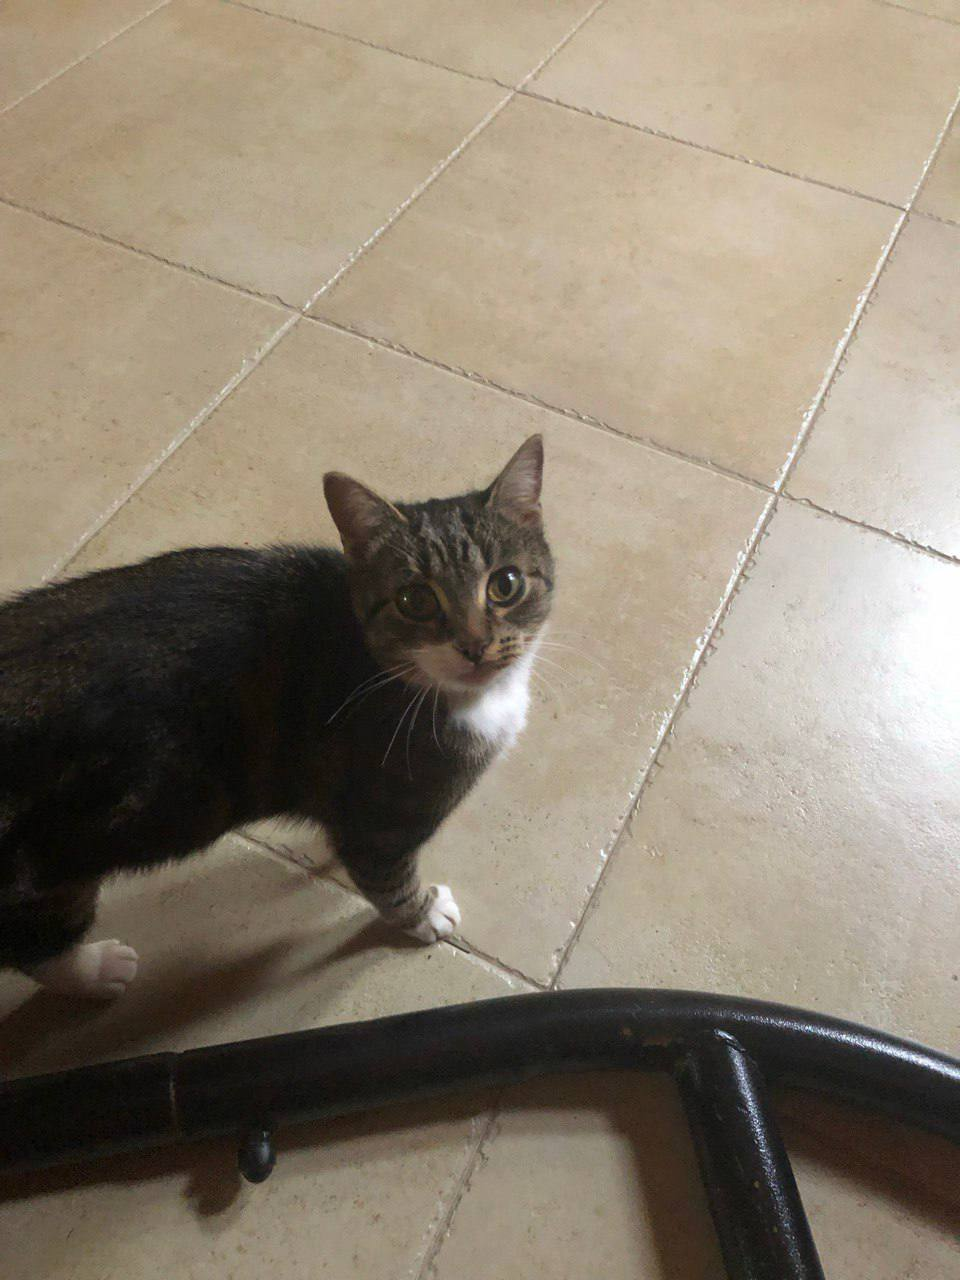

`кот Елены Кантонистовой`